# 탐색적 데이터 분석

## #01. 작업준비

### 1. 패키지 참조

In [1]:
import sys
sys.path.append('../')
import helper

import numpy as np
from pandas import read_excel, DataFrame, get_dummies
from matplotlib import pyplot as plt
import seaborn as sb

### 2. 데이터 가져오기

In [6]:
origin = read_excel('분석용데이터.xlsx')
print(origin.shape)
print(origin.info())
origin.head()

(318815, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318815 entries, 0 to 318814
Data columns (total 25 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   기준_년_코드    318815 non-null  int64  
 1   기준_분기_코드   318815 non-null  int64  
 2   상권_코드      318815 non-null  int64  
 3   분기당_매출_금액  318807 non-null  float64
 4   주중_매출_금액   318807 non-null  float64
 5   주말_매출_금액   318807 non-null  float64
 6   남성_매출_금액   318807 non-null  float64
 7   여성_매출_금액   318807 non-null  float64
 8   점포수        318807 non-null  float64
 9   Covid19    318807 non-null  float64
 10  일과시간_금액    318807 non-null  float64
 11  일과이후_금액    318807 non-null  float64
 12  청년금액       318807 non-null  float64
 13  중년금액       318807 non-null  float64
 14  장년금액       318807 non-null  float64
 15  상권_코드_명    318807 non-null  object 
 16  엑스좌표_값     318807 non-null  float64
 17  와이좌표_값     318807 non-null  float64
 18  시군구_코드     318807 non-null  float64
 19  행정동_코드    

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액,점포수,Covid19,...,상권_코드_명,엑스좌표_값,와이좌표_값,시군구_코드,행정동_코드,시군구명,시군구코드,도심,총_직장_인구_수,총_생활인구_수
0,2018,1,1000289,6044732.0,6044732.0,0.0,6044732.0,0.0,4.0,0.0,...,인촌로17가길,202091.0,454230.0,11290.0,11290600.0,성북구,11290.0,0.0,NaN,NaN
1,2018,1,1000289,215709724.0,144307921.0,71401803.0,96702568.0,109364383.0,3.0,0.0,...,인촌로17가길,202091.0,454230.0,11290.0,11290600.0,성북구,11290.0,0.0,NaN,NaN
2,2018,1,1000289,52890511.0,33998855.0,18891656.0,25764148.0,24829371.0,1.0,0.0,...,인촌로17가길,202091.0,454230.0,11290.0,11290600.0,성북구,11290.0,0.0,NaN,NaN
3,2018,1,1000289,34741527.0,34741527.0,0.0,33831273.0,910254.0,3.0,0.0,...,인촌로17가길,202091.0,454230.0,11290.0,11290600.0,성북구,11290.0,0.0,NaN,NaN
4,2018,1,1000289,16863024.0,13525303.0,3337721.0,3745929.0,12665481.0,10.0,0.0,...,인촌로17가길,202091.0,454230.0,11290.0,11290600.0,성북구,11290.0,0.0,NaN,NaN


### 3. 명목형 변수에 대한 데이터 타입 변경

In [8]:
df = origin.astype({
     '기준_년_코드': 'category',
    '기준_분기_코드':  'category',
    '상권_코드': 'category',
    '상권_코드_명': 'category',
    '시군구_코드': 'category',
    '행정동_코드': 'category',
    '시군구명': 'category',
    '시군구코드': 'category',
    'Covid19':'category',
    '도심': 'category',
    
})

## #02. 연속형 변수에 대한 기초 통게량 확인

### 결측치 확인

In [9]:
df.isna().sum()

기준_년_코드          0
기준_분기_코드         0
상권_코드            0
분기당_매출_금액        8
주중_매출_금액         8
주말_매출_금액         8
남성_매출_금액         8
여성_매출_금액         8
점포수              8
Covid19          8
일과시간_금액          8
일과이후_금액          8
청년금액             8
중년금액             8
장년금액             8
상권_코드_명          8
엑스좌표_값           8
와이좌표_값           8
시군구_코드           8
행정동_코드           8
시군구명             8
시군구코드            8
도심               8
총_직장_인구_수    96683
총_생활인구_수     96683
dtype: int64

### 결측치가 있는 데이터의 내용을 확인

In [10]:
null_df = df.query('(총_직장_인구_수.isnull()) or (총_생활인구_수.isnull())')

> 생활인구가 집계되지 않은 지역은 행정구에서 데이터 수집이 이루어지지 않은 것으로 보고 분석에서 제외하기로 함.

### 결측치 정제

In [12]:
df2 = df.dropna()
df2.isna().sum()

print(df2.shape)

(222124, 25)


### 기초통계량 확인

In [13]:
tmp = df2.drop(['엑스좌표_값', '와이좌표_값'], axis=1)
tmp.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
분기당_매출_금액,2.550897e+08,7.510396e+08,53.0,19381384.25,68322769.0,2.236953e+08,9.334306e+10
주중_매출_금액,1.945460e+08,6.138572e+08,-70301897.0,14430924.50,51015538.5,1.693071e+08,9.060803e+10
주말_매출_금액,6.054370e+07,1.894200e+08,-60053636.0,2446229.25,13467007.0,5.076214e+07,1.187360e+10
남성_매출_금액,1.238206e+08,3.715709e+08,0.0,7664530.50,30326435.0,1.056897e+08,4.468054e+10
여성_매출_금액,1.057898e+08,3.354464e+08,-7499697.0,6592710.00,26861672.0,9.201153e+07,2.358525e+10
점포수,4.676654e+00,6.378883e+00,0.0,2.00,3.0,5.000000e+00,3.900000e+02
일과시간_금액,1.419728e+08,5.305432e+08,-23926190.0,6694564.00,30981688.5,1.167935e+08,6.369344e+10
일과이후_금액,1.131169e+08,3.105393e+08,-86927726.0,6442846.25,26196999.0,9.320949e+07,2.964962e+10
청년금액,8.086605e+07,2.280624e+08,-3685222.0,3407537.00,16451777.5,6.565691e+07,1.568936e+10
중년금액,1.099931e+08,3.667343e+08,0.0,7627903.00,28740611.5,9.284734e+07,3.420627e+10


### 상자그림 확인

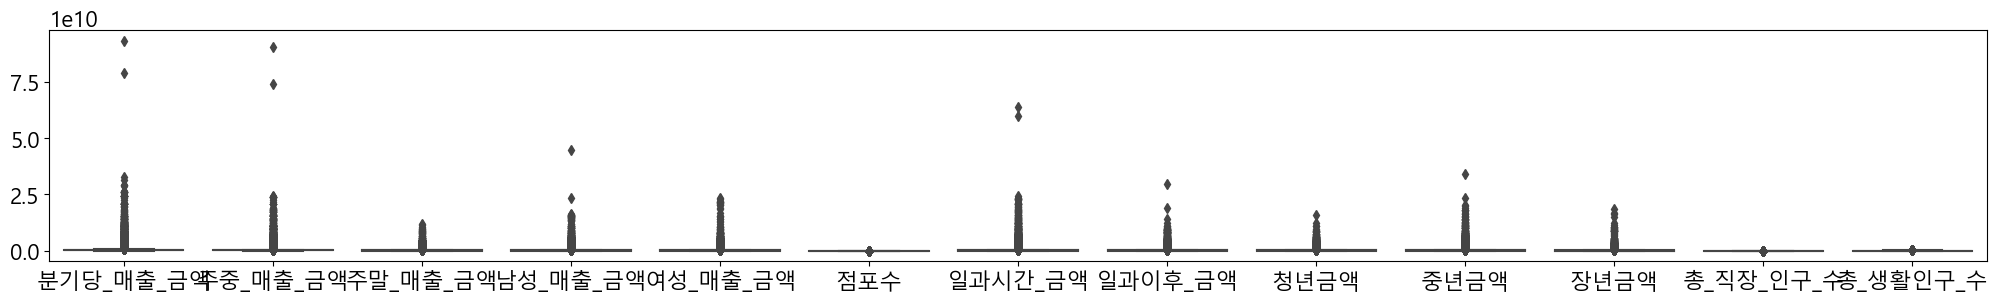

In [14]:
plt.figure(figsize=(25,3))
sb.boxplot(tmp)
plt.show()
plt.close()

> 무조건 표준화
